# Sentiment Analysis usando API Twitter

In questa lezione andremo ad utilizzare tweet con alcuni hashtag pre fare Sentiment Analysis (tramite una libreria Python) e procedere con l'analisi dei dati con Pandas e Matplotlib.

In preparazione della lezione su Twitter e API occorre che ognuno di voi segua i seguenti steps:

1. Registrarsi a Twitter (se no ne si ha già uno)
2. Accedere al proprio account e andare qui https://apps.twitter.com/
3. Creare una nuova app
4. Non ha importanza il nome e potete lasciare https:// nel campo del sito personele
5. Una volta creare e selezionata la vostra app andata nella tab 'Keys and Access Tokens'
6. Salvatevi le seguenti quattro voci che ci servieranno per la lezione:

Nella sezione _Application Settings_: Consumer Key (API Key), Consumer Secret (API Secret)  
Nella sesione _Your Access Token_: Access Token, Access Token Secret

## TextBlob

La libreria che utlizzeremo per il processamento del testo e Sentiment Analysis è TextBlob.  
Praticheremo le maggiori funzioni per poi ultizzarla in seguito con i tweets acquisiti.  

In psarticolare per la **Sentiment Analysis** useremo:
* **Polarity** [-1, 1], in cui -1 significa molto negativo e +1 molto positivo
* **Subjectivity** [0, 1], in cui 0 significa di molto oggettivo e 1 significa molto soggettivo
* **Sentiment**, riporta insieme i valori di Polarity e Subjectivity


Documentazione: http://textblob.readthedocs.io/en/dev  
Link dei moduli: http://textblob.readthedocs.io/en/dev/api_reference.html#module-textblob.blob

In [1]:
# Per installare le librerie Tweepy e TextBlob da terminale scriviamo
# pip install tweepy
# pip install textblob

import tweepy # libreria per accedere alle API di Twitter
from textblob import TextBlob # libreria che useremo per fare Sentiment Analysis
import csv # libreria che useremo per creare direttamente csv

import pandas as pd
import matplotlib.pyplot as plt

### Prima di estrarre dati da Twitter esplorariamo la libreria TextBlob

Iniziamo con alcuni comandi di esplorazione del testo

In [2]:
python = TextBlob("Python è distribuito con licenza Open-Source approvata dalla OSI.")
python.detect_language()

'it'

In [3]:
simple = TextBlob("Simple is better than complex. Complex is better than complicated.")
simple.translate(to='it')

TextBlob("Semplice è meglio che complesso. Il complesso è meglio che complicato.")

In [4]:
testo = TextBlob("Il registro è sul tavolo")
testo.detect_language()

'it'

### Testiamo la Sentiment Analysis della libreria TextBlob

#### Notiamo la differenza di Polarity

In [5]:
life = TextBlob("I love life")
life.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [6]:
life.polarity

0.5

In [7]:
humans = TextBlob("I love humans")
humans.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [8]:
ananas = TextBlob("I hate pineapples")
ananas.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

#### Notiamo la differenza di Subjectivity

In [9]:
sphere = TextBlob("The Earth is a sphere")
sphere.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [10]:
sphere.subjectivity

0.0

In [11]:
flat = TextBlob("The Earth is flat")
flat.sentiment

Sentiment(polarity=-0.025, subjectivity=0.125)

In [12]:
sky = TextBlob("The sky is blue")
sky.sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [13]:
my_town = TextBlob("I love my town, I live in Lisbon")
my_town.sentiment

Sentiment(polarity=0.3181818181818182, subjectivity=0.55)

#### Con che oggetti abbiamo a che fare?

In [14]:
type(my_town.sentiment)

textblob.en.sentiments.Sentiment

In [15]:
type(my_town.sentiment.polarity)

float

In [16]:
type(my_town.polarity)

float

## Ora passiamo all'acquisizione dei tweets da Twitter

#### Salviamo i Consumer Key e Access token

In [17]:
consumer_key = ' '
consumer_secret = ' '

access_token = ' '
access_token_secret = ' '

#### Autentichiamoci in Twitter

In [18]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#### Visualizziamo gli ultimi tweet pubblici salvandoli in un .csv

Usiamo la libreria Python **open** e **csv**.

Potete leggere questa documentazione per approfondire i modi di apertura disponibili olatre ad **'a'**:  
https://docs.python.org/3.1/library/functions.html#open

In [19]:
csvFile = open('results_kindess.csv', 'a') 
csvWriter = csv.writer(csvFile)

last_tweets = api.search('#kindness')

for tweet in last_tweets:
    text = TextBlob(tweet.text)
    print(tweet.text, text.sentiment)
    print(' ')
    print('==== TWEET AT: %s ====' %str(tweet.created_at))
    csvWriter.writerow([tweet.created_at, tweet.text, text.polarity, text.subjectivity])
        
csvFile.close()

RT @bluzzofficial: Couple Gets Engaged Just Hours Before They Become Heroes At a Liquor Store -- https://t.co/ZhODf2cbMS #viral #news #brea… Sentiment(polarity=0.0, subjectivity=0.0)
 
==== TWEET AT: 2018-03-09 16:28:16 ====
RT @TrainingMindful: "Kindness in words creates confidence. Kindness in thinking creates profoundness. #Kindness in giving creates love." L… Sentiment(polarity=0.5, subjectivity=0.6)
 
==== TWEET AT: 2018-03-09 16:28:14 ====
RT @bluzzofficial: A Young Grocery Store Cashier's Act Of Kindness -- https://t.co/Iojk2XoLWL #viral #news #breaking #inspirational #Trendi… Sentiment(polarity=0.3, subjectivity=0.7)
 
==== TWEET AT: 2018-03-09 16:28:13 ====
Embracing #kindness as a catalyst for change.    https://t.co/WQrouWMiKC Sentiment(polarity=0.0, subjectivity=0.0)
 
==== TWEET AT: 2018-03-09 16:27:00 ====
We have our weekend goals ready! What are yours? #WeekendGoals #WeekendVibes #Goals #Kindness #Consideration… https://t.co/grb1uv7LRu Sentiment(polarity=0.25, subjectiv

### Creiamo un dataset più corposo da analizzare ripetendo l'operazione 10 volte

In [20]:
csvFile = open('results_elections.csv', 'a') 
csvWriter = csv.writer(csvFile)


for i in range(18):
    last_tweets = api.search('#Election2018')    
    for tweet in last_tweets:
        text = TextBlob(tweet.text)
        csvWriter.writerow([tweet.created_at, tweet.text, text.polarity, text.subjectivity])

csvFile.close()

### Importiamo i tweet dal .csv al Pandss Dataframe ed esploriamoli

In [21]:
df_elect = pd.read_csv('results_elections.csv', header=None, names=['Date', 'Tweet', 'Polarity', 'Subjectivity'])

In [22]:
type(df_elect)

pandas.core.frame.DataFrame

In [23]:
df_elect.shape

(810, 4)

In [24]:
df_elect.head()

,Date,Tweet,Polarity,Subjectivity
0,2018-03-09 16:09:54,RT @WestForCongress: Volunteers are needed to ...,0.25000,0.3000
1,2018-03-09 16:09:39,"RT @MAGOProject: Messing with Texas, Yet Again...",0.00000,0.0000
2,2018-03-09 16:09:12,RT @didikins4life: Today marks the beginning o...,1.00000,1.0000
3,2018-03-09 16:07:49,RT @didikins4life: Today marks the beginning o...,1.00000,1.0000
4,2018-03-09 16:07:33,"RT @DJKatie888: If the ""Dreamers know no other...",0.03125,0.1875


In [25]:
df_elect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 4 columns):
Date            810 non-null object
Tweet           810 non-null object
Polarity        810 non-null float64
Subjectivity    810 non-null float64
dtypes: float64(2), object(2)
memory usage: 25.4+ KB


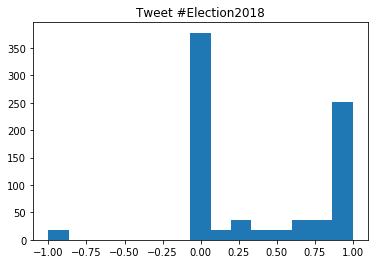

In [26]:
plt.hist(df_elect['Polarity'], bins=15)
plt.title('Tweet #Election2018')
plt.show()

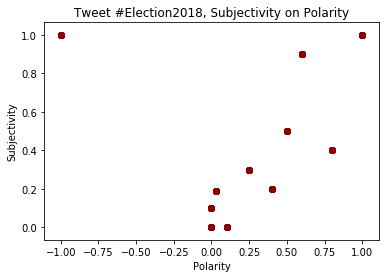

In [27]:
plt.scatter(df_elect['Polarity'], df_elect['Subjectivity'], alpha=0.5, color='darkred')

plt.title('Tweet #Election2018, Subjectivity on Polarity')
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

plt.show()

In [28]:
e_pos = df_elect[df_elect['Polarity'] >= 0]
e_pos.count()

Date            792
Tweet           792
Polarity        792
Subjectivity    792
dtype: int64

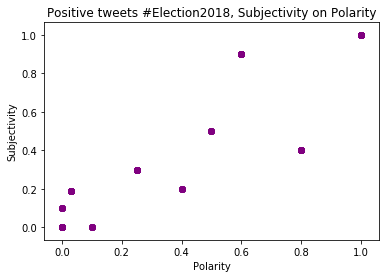

In [29]:
plt.scatter(e_pos['Polarity'], e_pos['Subjectivity'], alpha=0.3, color='purple')

plt.title('Positive tweets #Election2018, Subjectivity on Polarity')
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

plt.show()

In [30]:
e_neg = df_elect[df_elect['Polarity'] < 0]
e_neg.shape

(18, 4)

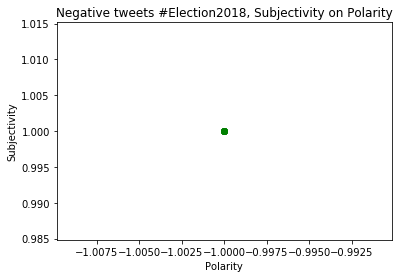

In [31]:
plt.scatter(e_neg['Polarity'], e_neg['Subjectivity'], alpha=0.3, color='green')

plt.title('Negative tweets #Election2018, Subjectivity on Polarity')
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')


plt.show()